# Just for testing random things

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys


if __package__ is None:

    module_path = os.path.abspath(os.path.join('..'))
    sys.path.append(module_path)

    __package__ = os.path.basename(module_path)


from src.utils.modelling.physical import equilibrium_constant_reparameterisation
from src.srv.parameter_prediction.interactions import INTERACTION_FIELDS_TO_WRITE, INTERACTION_TYPES
from src.utils.misc.type_handling import flatten_listlike
from src.utils.results.analytics.naming import get_true_interaction_cols
from src.utils.misc.io import get_pathnames


In [11]:
fn = '../data/generate_seqs_flexible/2023_04_17_205800/circuit_stats.csv'
data = pd.read_csv(fn)

In [12]:
# good_cols =
data.columns

Index(['name', 'interacting', 'self_interacting', 'num_interacting',
       'num_self_interacting', 'binding_sites_0-0', 'binding_sites_0-1',
       'binding_sites_0-2', 'binding_sites_1-0', 'binding_sites_1-1',
       'binding_sites_1-2', 'binding_sites_2-0', 'binding_sites_2-1',
       'binding_sites_2-2', 'binding_rates_dissociation_0-0',
       'binding_rates_dissociation_0-1', 'binding_rates_dissociation_0-2',
       'binding_rates_dissociation_1-0', 'binding_rates_dissociation_1-1',
       'binding_rates_dissociation_1-2', 'binding_rates_dissociation_2-0',
       'binding_rates_dissociation_2-1', 'binding_rates_dissociation_2-2',
       'energies_0-0', 'energies_0-1', 'energies_0-2', 'energies_1-0',
       'energies_1-1', 'energies_1-2', 'energies_2-0', 'energies_2-1',
       'energies_2-2', 'eqconstants_0-0', 'eqconstants_0-1', 'eqconstants_0-2',
       'eqconstants_1-0', 'eqconstants_1-1', 'eqconstants_1-2',
       'eqconstants_2-0', 'eqconstants_2-1', 'eqconstants_2-2',
      

In [13]:
datam = data.melt(['name'], value_vars=get_true_interaction_cols(data, INTERACTION_TYPES[0]), var_name='idx', value_name=INTERACTION_TYPES[0])
for i in INTERACTION_TYPES[1:]:
    dfm = data.melt(['name'], value_vars=get_true_interaction_cols(data, i), var_name='_', value_name=i)
    datam[i] = dfm[i]

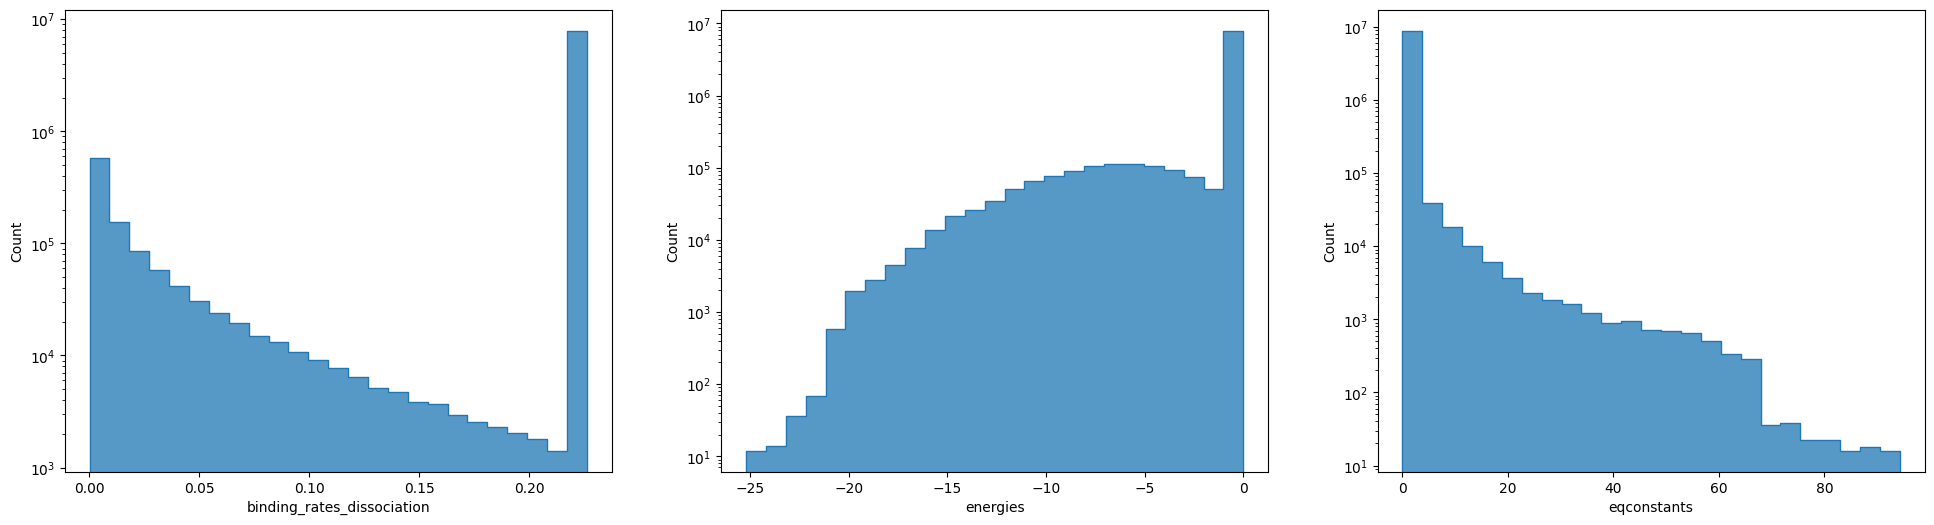

In [19]:
plt.figure(figsize=(8*len(INTERACTION_TYPES), 6))
for ii, i in enumerate(INTERACTION_TYPES):
    ax = plt.subplot(1, len(INTERACTION_TYPES), ii+1)
    sns.histplot(datam, x=i, element='step', log_scale=[False, True])